Para el analisis del dataset '2021-2022 Football Player Stats' realizamos el proceso de EDA para mostrar las caracteristicas del mismo, y la justificación de las variables que se usaran para la elaboración del proyecto.

Las siguientes librerias son las necesarias para ejecutar todo el codigo presente en este markdown:

In [2]:
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import psycopg2

In [3]:
def connect_postgres():
    connection = psycopg2.connect(
        database="Soccer",
        user="postgres",
        password="Ronny1212",
        host="localhost",
        port=5432
    )
    return connection
    print("Database connection ok")

In [15]:
players_df = pd.read_csv("C:/Prevalidador_Requisitos_Saldo_a_favor_Renta_v3.1.0-20/2021-2022 Football Player Stats.csv", sep=";", encoding="ISO-8859-1")
nombre="playerstats.csv"
players_df.to_csv(nombre,index=False,sep=",")
connection = connect_postgres()
cursor = connection.cursor()
query1 = cursor.execute("""SELECT * FROM playerstats""")
connection.commit()
resultados = cursor.fetchall()
df = pd.DataFrame(resultados)
df.columns = ['rk',
        'player',
        'nation',
        'position',
        'team',
        'league',
        'age',
        'born',
        'mp',
        'starts',
        'min',
        'S90',
        'goals',
        'shots',
        'sot',
        'sotPORCENT',
        'gsh',
        'gsot',
        'shodist',
        'shofk',
        'shopk',
        'pkatt',
        'pastotcmp',
        'pastoatt',
        'pastotcmpPORCENT',
        'pastotdist',
        'pastotprgdist',
        'passhocmp',
        'passhoatt',
        'passhocmpPORCENT',
        'pasmedcmp',
        'pasmedatt',
        'pasmedcmpPORCENT',
        'pasloncmp',
        'paslonatt',
        'pasloncmpPORCENT',
        'assists',
        'passass',
        'pas3rd',
        'ppa',
        'crspa',
        'pasprog',
        'pasatt',
        'paslive',
        'pasdead',
        'pasfk',
        'tb',
        'paspress',
        'sw',
        'pascrs',
        'ck',
        'ckin',
        'ckout',
        'ckstr',
        'pasground',
        'paslow',
        'pashigh',
        'paswleft',
        'paswright',
        'paswhead',
        'ti',
        'paswother',
        'pascmp',
        'pasoff',
        'pasout',
        'pasint',
        'pasblocks',
        'sca',
        'scapasslive',
        'scapassdead',
        'scadrib',
        'scash',
        'scafld',
        'scadef',
        'gca',
        'gcapasslive',
        'gcapassdead',
        'gcadrib',
        'gcash',
        'gcafld',
        'gcadef',
        'tkl',
        'tklwon',
        'tkldef3rd',
        'tklmid3rd',
        'tklatt3rd',
        'tkldri',
        'tkldriatt',
        'tkldriPORCENT',
        'tkldripast',
        'press',
        'pressucc',
        'pressPORCENT',
        'presdef3rd',
        'presmid3rd',
        'presatt3rd',
        'blocks',
        'blksh',
        'blkshsv',
        'blkpass',
        'int',
        'tklmasint',
        'clr',
        'err',
        'touches',
        'toudefpen',
        'toudef3rd',
        'toumid3rd',
        'touatt3rd',
        'touattpen',
        'toulive',
        'drisucc',
        'driatt',
        'drisuccPORCENT',
        'dripast',
        'drimegs',
        'carries',
        'cartotdist',
        'carprgdist',
        'carprog',
        'car3rd',
        'cpa',
        'carmis',
        'cardis',
        'rectarg',
        'rec',
        'recPORCENT',
        'recprog',
        'crdy',
        'crdr',
        'crdy2',
        'fls',
        'fld',
        'off',
        'crs',
        'tklw',
        'pkwon',
        'pkcon',
        'og',
        'recov',
        'aerwon',
        'aerlost',
        'aerwonPORCENT']

In [7]:
df.head()

,rk,player,nation,position,team,league,age,born,mp,starts,...,off,crs,tklw,pkwon,pkcon,og,recov,aerwon,aerlost,aerwonPORCENT
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [8]:
df.shape

(2921, 143)

In [9]:
df.dtypes

rk                 int64
player            object
nation            object
position          object
team              object
                  ...   
og               float64
recov            float64
aerwon           float64
aerlost          float64
aerwonPORCENT    float64
Length: 143, dtype: object

In [10]:
df.dtypes.value_counts()

float64    133
int64        5
object       5
dtype: int64

Aqui revisamos la existencia de valores nulos en las columnas, y como podemos observar que existen valores nulos en 2 columnas, 'Nation' y 'Age'.

In [11]:
df.isnull().any()

rk               False
player           False
nation            True
position         False
team             False
                 ...  
og               False
recov            False
aerwon           False
aerlost          False
aerwonPORCENT    False
Length: 143, dtype: bool

Y aqui miramos cuantos valores nulos existen en la columna 'Age', notamos que solo hay solo 1 por lo que su efecto en los analisis y procedimientos es insignificante.

In [16]:
Nulls = df['Age'].isnull().sum()
print(Nulls)

1


In [35]:
total_filas = len(df)
porcentaje_nulls = round((Nulls/ total_filas)* 100, 2)
print(porcentaje_nulls)

0.03


Al igual que la anterior, aqui miramos cuantos valores nulos existen en la columna 'Nation', y al igual que 'Age' notamos que solo hay solo 1 por lo que su efecto en los analisis y procedimientos es insignificante.

In [36]:
Nulls1 = df['Nation'].isnull().sum()
print(Nulls1)

1


In [37]:
total_filas = len(df)
porcentaje_nulls = round((Nulls1/ total_filas)* 100, 2)
print(porcentaje_nulls)

0.03


Luego hacemos un analisis de los datos tipo 'int64' osea numeros enteros.

In [17]:
df.describe(include="int64")

,rk,born,mp,starts,min
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,1461.000000,1994.725094,18.800068,13.749743,1234.756248
std,843.364393,37.210426,11.619882,11.393763,977.941288
min,1.000000,0.000000,1.000000,0.000000,1.000000
25%,731.000000,1992.000000,8.000000,3.000000,307.000000
50%,1461.000000,1996.000000,20.000000,12.000000,1102.000000
75%,2191.000000,1999.000000,29.000000,23.000000,2025.000000
max,2921.000000,2006.000000,38.000000,38.000000,3420.000000


Luego hacemos un analisis de los datos tipo 'Object' que pueden ser tipo 'varchar' o 'boleano'

In [18]:
df.describe(include="object") 

,player,nation,position,team,league
count,2921,2920,2921,2921,2921
unique,2786,102,11,98,5
top,Marcelo,ESP,DF,Salernitana,Serie A
freq,3,435,942,42,632


In [ ]:
Analisamos el rango de edad de los jugadores que se encuentran principalmente en el rango de 18 a 41 años de edad.

In [20]:
df["age"].unique()

array([22., 34., 29., 23., 19., 24., 26., 20., 30., 25., 18., 21., 33.,
       28., 27., 36., 32., 31., 39., 16., 35., 37., 17., 40., 38., nan,
       41.])

Tambien miramos las diferentes posiciones y sus variantes, los jugadores que poseen las posiciones de 4 caracteres, son jugadores que pueden jugar o que han tenido experiencia jugando en 2 posiciones diferentes.

In [22]:
df['position'].unique()

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW', 'GKMF'], dtype=object)

In [23]:
df['nation'].unique()

array(['ENG', 'MAR', 'GHA', 'FRA', 'NGA', 'PER', 'ITA', 'GER', 'ARG',
       'SCO', 'USA', 'ARM', 'SUI', 'ESP', 'COL', 'BIH', 'CIV', 'NOR',
       'REU', 'EQG', 'NED', 'AUT', 'CHI', 'GUF', 'PAR', 'TUR', 'ROU',
       'BRA', 'GAB', 'SEN', 'WAL', 'DEN', 'SWE', 'PAN', 'JAM', 'URU',
       'MEX', 'JPN', 'KVX', 'ALB', 'TOG', 'ALG', 'IRN', 'CRO', 'LUX',
       'CMR', 'COD', 'GRN', 'CZE', 'MKD', 'GAM', 'GUI', 'CPV', 'SUR',
       'POL', 'SVN', 'SVK', 'BEL', 'ISL', 'GNB', 'MLI', 'SRB', 'TUN',
       'NZL', 'ECU', 'POR', 'NIR', 'RUS', 'IRL', 'VEN', 'ANG', 'ISR',
       'ZAM', 'CAN', 'MTQ', 'KOR', 'GRE', 'BEN', 'CRC', 'HON', 'EGY',
       'MAD', 'FIN', 'CGO', 'DOM', 'HUN', 'PHI', 'BUL', 'AUS', 'UKR',
       'MNE', 'BFA', 'ZIM', 'SLE', 'CYP', 'CTA', 'CHN', None, 'GEO',
       'MOZ', 'RSA', 'CHA', 'UZB'], dtype=object)

Por otro lado y como parte esencial de este proyecto, analisamos todas las columnas dependiendo de la posicion del jugador para mirar cuales de ellas son las mas representativas y hacer un filtro de las columnas utiles para el analisis de precio.

In [25]:
goalkeepers_df = df.loc[df['position'] == 'GK']
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(goalkeepers_df)

        rk              player nation position            team  \
22      23  Julen Agirrezabala    ESP       GK   Athletic Club   
60      61       Doðan Alemdar    TUR       GK          Rennes   
65      66             Alisson    BRA       GK       Liverpool   
115    116     Alphonse Areola    FRA       GK        West Ham   
123    124   Kepa Arrizabalaga    ESP       GK         Chelsea   
...    ...                 ...    ...      ...             ...   
2821  2822          Danny Ward    WAL       GK  Leicester City   
2860  2861     Freddie Woodman    ENG       GK   Newcastle Utd   
2899  2900       Robin Zentner    GER       GK        Mainz 05   
2909  2910         Jeroen Zoet    NED       GK          Spezia   
2914  2915         Petar Zovko    BIH       GK          Spezia   

              league   age  born  mp  starts   min   S90  goals  shots  sot  \
22           La Liga  21.0  2000   4       4   360   4.0    0.0    0.0  0.0   
60           Ligue 1  19.0  2002  12      12  108

In [27]:
goalkeepers_df = players_df.loc[df['position'] == 'DF']
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(goalkeepers_df)

        Rk                Player Nation Pos            Squad            Comp  \
0        1            Max Aarons    ENG  DF     Norwich City  Premier League   
1        2      Yunis Abdelhamid    MAR  DF            Reims         Ligue 1   
8        9            Luis Abram    PER  DF          Granada         La Liga   
9       10      Francesco Acerbi    ITA  DF            Lazio         Serie A   
12      13          Marcos Acuña    ARG  DF          Sevilla         La Liga   
...    ...                   ...    ...  ..              ...             ...   
2906  2907  Christoph Zimmermann    GER  DF     Norwich City  Premier League   
2907  2908   Oleksandr Zinchenko    UKR  DF  Manchester City  Premier League   
2912  2913        Banhie Zoukrou    FRA  DF           Troyes         Ligue 1   
2913  2914            Kurt Zouma    FRA  DF         West Ham  Premier League   
2915  2916         Igor Zubeldia    ESP  DF    Real Sociedad         La Liga   

       Age  Born  MP  Starts   Min   90

In [28]:
goalkeepers_df = players_df.loc[df['position'] == 'MF']
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(goalkeepers_df)

        Rk             Player Nation Pos          Squad            Comp   Age  \
2        3  Salis Abdul Samed    GHA  MF  Clermont Foot         Ligue 1  22.0   
3        4    Laurent Abergel    FRA  MF        Lorient         Ligue 1  29.0   
11      12       Mohamed Achi    FRA  MF         Nantes         Ligue 1  20.0   
14      15        Tyler Adams    USA  MF     RB Leipzig      Bundesliga  23.0   
19      20   Michel Aebischer    SUI  MF        Bologna         Serie A  25.0   
...    ...                ...    ...  ..            ...             ...   ...   
2893  2894       Oier Zarraga    ESP  MF  Athletic Club         La Liga  23.0   
2904  2905    Piotr Zieli?ski    POL  MF         Napoli         Serie A  28.0   
2916  2917   Martín Zubimendi    ESP  MF  Real Sociedad         La Liga  23.0   
2917  2918   Szymon ?urkowski    POL  MF         Empoli         Serie A  24.0   
2918  2919    Martin Ødegaard    NOR  MF        Arsenal  Premier League  23.0   

      Born  MP  Starts   Mi

In [29]:
goalkeepers_df = players_df.loc[df['position'] == 'FW']
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(goalkeepers_df)

        Rk          Player Nation Pos           Squad            Comp   Age  \
4        5     Charles Abi    FRA  FW   Saint-Étienne         Ligue 1  22.0   
5        6  Dickson Abiama    NGA  FW  Greuther Fürth      Bundesliga  23.0   
6        7  Matthis Abline    FRA  FW          Rennes         Ligue 1  19.0   
7        8   Tammy Abraham    ENG  FW            Roma         Serie A  24.0   
13      14       Che Adams    SCO  FW     Southampton  Premier League  25.0   
...    ...             ...    ...  ..             ...             ...   ...   
2887  2888  Nicolò Zaniolo    ITA  FW            Roma         Serie A  22.0   
2890  2891    Duván Zapata    COL  FW        Atalanta         Serie A  31.0   
2898  2899    Arber Zeneli    KVX  FW           Reims         Ligue 1  27.0   
2910  2911    Simon Zoller    GER  FW          Bochum      Bundesliga  30.0   
2919  2920     Milan ?uri?    BIH  FW     Salernitana         Serie A  32.0   

      Born  MP  Starts   Min   90s  Goals  Shots   

Durante la revision de las columnas por posicion nos dimos cuenta que existen columnas con valores iguales, columnas las cuales fueron eliminadas ya que no represetan algo significativo y que podrian generar multicolinealidad con las otras columnas.

In [31]:
p = df[['pasatt','pastoatt']]
a = p.head(10)
print(a)

   pasatt  pastoatt
0   45.00     45.00
1   47.00     47.00
2   61.00     61.00
3   49.80     49.80
4   12.00     12.00
5   17.20     17.20
6    9.09      9.09
7   20.20     20.20
8   35.50     35.50
9   71.10     71.10


In [33]:
p = df[['pascmp','pastotcmp']]
a = p.head(10)
print(a)

   pascmp  pastotcmp
0   34.00      34.00
1   38.70      38.70
2   55.90      55.90
3   40.70      40.70
4    4.00       4.00
5   11.10      11.10
6    7.27       7.27
7   14.60      14.60
8   31.30      31.30
9   64.30      64.30


De igual manera que con las variables anteriores estas dos cuentan con la misma informacion por lo que se decidio quedar solo con la variable PasTotCmp

In [35]:
p = df[['pascrs','crs',]]
a = p.head(10)
print(a)

   pascrs   crs
0    1.41  1.41
1    0.06  0.06
2    0.36  0.36
3    0.79  0.79
4    2.00  2.00
5    0.25  0.25
6    0.91  0.91
7    0.70  0.70
8    0.00  0.00
9    0.04  0.04


Por ultimo realizamos un grafico con mathplotlib para tener una referencia visual de la media de la edad de los jugadores

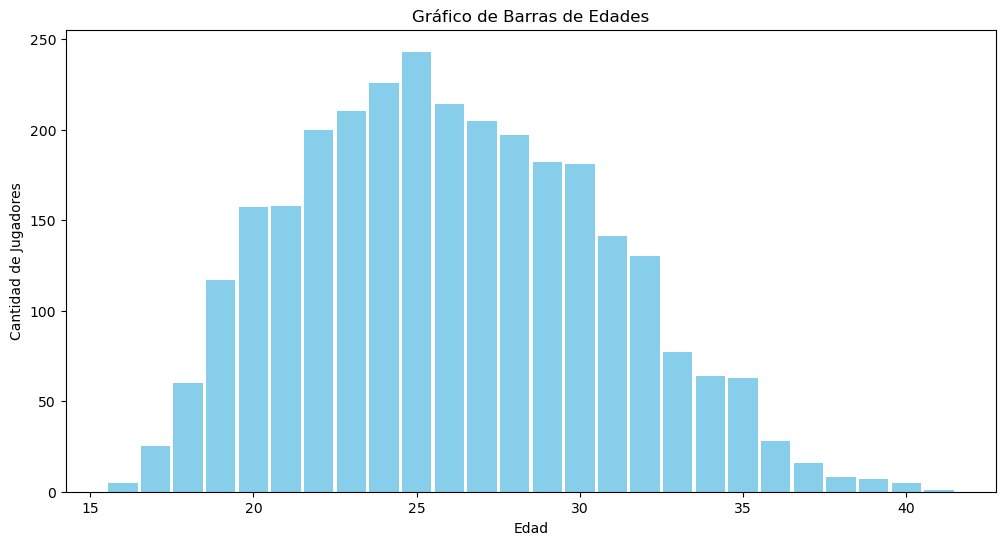

In [36]:
age_counts = df['age'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, width=0.9, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.title('Gráfico de Barras de Edades')
plt.show()